In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../data/taco_tracks.csv', parse_dates=['release_date'])
data

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Café Belga,Taco Hemingway,Café Belga,2018-07-13,1RgUcHLTLSMiNG941CYzQL,56,0.4600,0.670,249653,0.607,0.000002,8,0.3840,-7.606,1,0.1640,174.017,0.2460
1,ZTM,Taco Hemingway,Café Belga,2018-07-13,0kF9dFTuO9G2IpcDcPMKxQ,60,0.3690,0.816,279947,0.560,0.000000,10,0.4740,-7.602,0,0.1780,139.022,0.6320
2,Wszystko Na Niby,Taco Hemingway,Café Belga,2018-07-13,48A8IJh1Ggc8wfWwzG5yrk,55,0.4100,0.660,258187,0.534,0.000000,8,0.4940,-9.774,1,0.2240,78.006,0.5370
3,Reżyseria: Kubrick,Taco Hemingway,Café Belga,2018-07-13,1V0h7CzbB9AT8LZRzOCdTI,52,0.4540,0.674,211813,0.504,0.000000,1,0.3080,-5.457,0,0.3870,181.625,0.3200
4,2031,Taco Hemingway,Café Belga,2018-07-13,3wvhIkvzZKCab1FpZXkWI7,53,0.2250,0.859,299547,0.524,0.000000,5,0.0922,-8.450,1,0.3510,138.027,0.7000
5,Fiji,Taco Hemingway,Café Belga,2018-07-13,2CdCs9y04oDuYCF4ewNzI7,63,0.1970,0.774,242560,0.813,0.002330,5,0.1220,-5.569,0,0.1220,104.996,0.3510
6,Abonent jest czasowo niedostępny,Taco Hemingway,Café Belga,2018-07-13,1fnZtBU5wFERbmgPGp3fO0,51,0.3910,0.644,273960,0.636,0.000001,7,0.1320,-9.270,0,0.1420,110.150,0.1490
7,Motorola,Taco Hemingway,Café Belga,2018-07-13,0HM8Uj8DRSG24HmCbYEfb0,50,0.4170,0.793,191680,0.567,0.000000,1,0.1390,-9.638,1,0.1940,113.991,0.3000
8,Modigliani,Taco Hemingway,Café Belga,2018-07-13,0gP2wIzhyjlsxjidUekcqb,52,0.4390,0.722,230080,0.539,0.000000,5,0.4010,-8.615,0,0.1110,142.978,0.2120
9,Adieu,Taco Hemingway,Café Belga,2018-07-13,5PoFppTTSK8D2y7z4bZPjH,53,0.2350,0.756,286987,0.707,0.000000,1,0.7460,-6.689,1,0.2090,100.002,0.5180


In [12]:
data.shape

(89, 18)

In [46]:
# konfiguracja wyświetlania wykresów
plt.rcParams['figure.dpi'] = 90

## Rozkład taneczności na dyskografii Taco Hemingwaya

In [43]:
def vertical_line(x, **kwargs):
    plt.axvline(0.5, **kwargs)

In [44]:
def draw_distplot(data, row, cat):
    dist = sns.FacetGrid(data,
                         row=row,
                         height=2,
                         aspect=3,)
    dist.map(sns.distplot,
             cat,
             hist=False,
             rug=True,
             kde_kws={"shade": True})
    dist.map(vertical_line, cat)
    plt.xlim(0, 1)

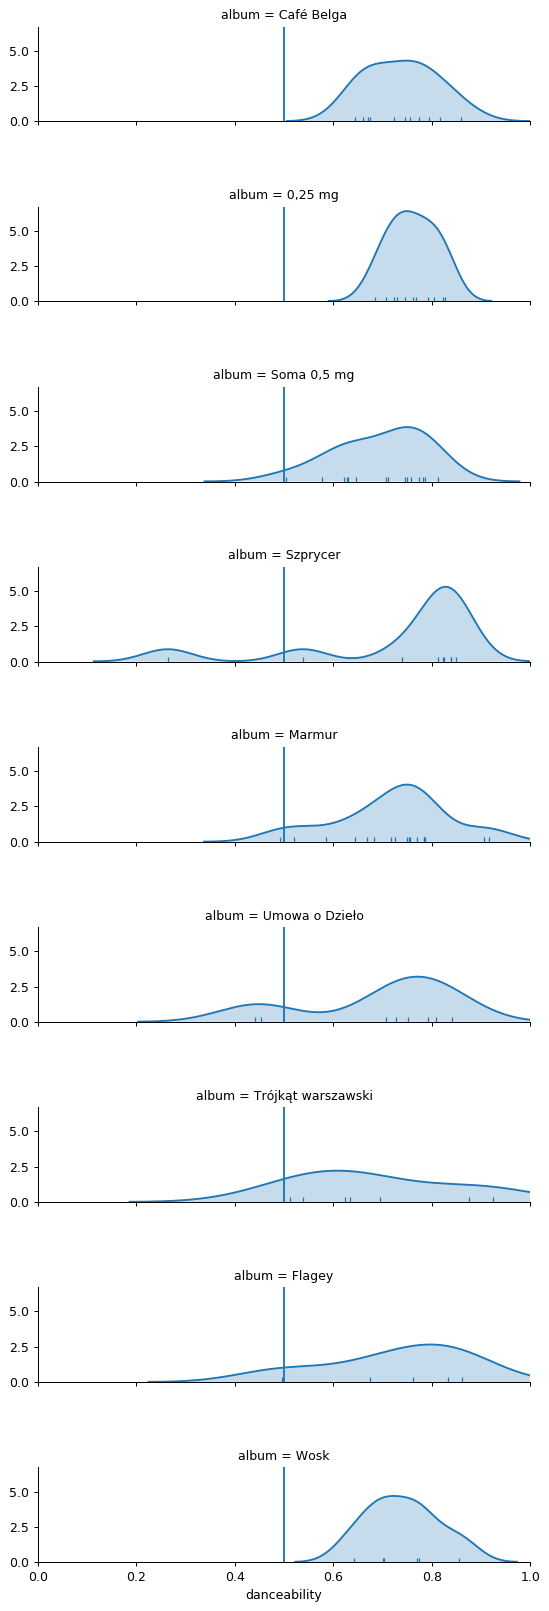

In [48]:
draw_distplot(data, 'album', 'danceability')
plt.subplots_adjust(hspace=0.9)

### Jaki jest najbardziej taneczny album Taco?

    total_danceability = danceability * duration_ms

In [50]:
dance_data = data.loc[:, ['album', 'danceability']]
dance_data['danceability'] = data['danceability'] * data['duration_ms'] / 10000
dance_data.head()

,album,danceability
0,Café Belga,16.726751
1,Café Belga,22.843675
2,Café Belga,17.040342
3,Café Belga,14.276196
4,Café Belga,25.731087


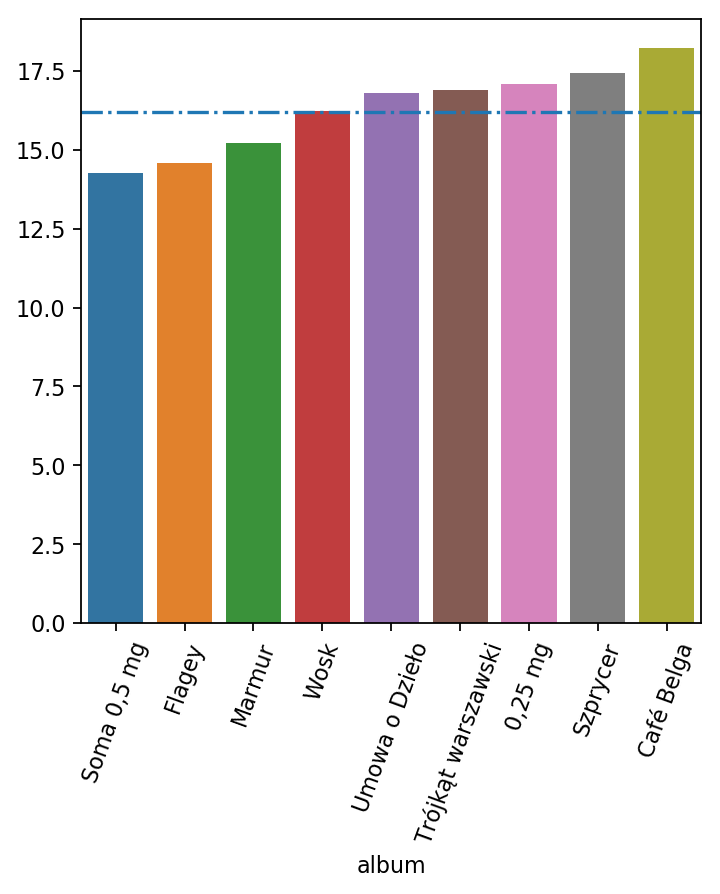

In [53]:
dance = dance_data.groupby(['album']).danceability.mean().sort_values()
plt.figure(figsize=(5,5), dpi= 160)
d = sns.barplot(dance.index, dance.values)
d.set_xticklabels(d.get_xticklabels(), rotation=70)
mean_value = dance_data.danceability.mean()
d.axhline(y=mean_value, linestyle='-.')

## Czy muzyka Taco jest pozytywna?

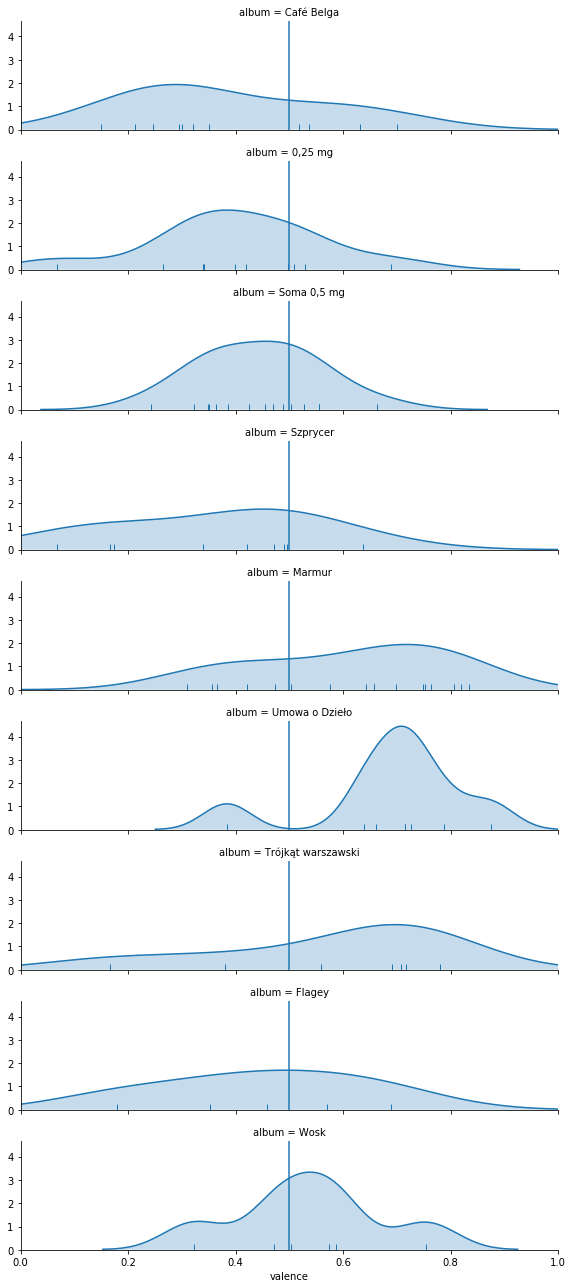

In [7]:
distplot(data, 'album', 'valence')

### Jaki jest najbardziej pozytywny album Taco?

    total_valence = valence * duration_ms

to do: wyznaczyć średnią total_valence dla każdego z albumów i przedstawić na wykresie

## Czy piosenki z poszczególnych albumów są do siebie podobne? PCA

**UWAGA:** Zauważyłam, że wykorzystanie PCA do grupowania piosenek z albumów nie daje żadnych sensownych wniosków (poza tym, że piosenki nie są na tyle unikalne, żeby grupowanie w ten sposób coś dało). Chcę potem powtórzyć PCA, ale nie grupować piosenek albumami, ale popularnością, którą wyznaczam w kolejnym podpunkcie.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]
x = data.loc[:, features].values
y = data.loc[:, ['album']].values

In [22]:
x = StandardScaler().fit_transform(x)

In [23]:
pd.DataFrame(data=x, columns=features).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.138438,-0.428856,0.499936,0.309675,-0.129800,0.583828,0.892438,0.734605,1.057850,-0.693701,1.872445,-1.295617
1,-0.271061,0.830764,1.035851,-0.131979,-0.129823,1.103434,1.416017,0.736135,-0.945313,-0.591395,0.684829,0.724444
2,-0.086562,-0.515132,0.650907,-0.376298,-0.129823,0.583828,1.532368,-0.094731,1.057850,-0.255247,-1.385855,0.227279
3,0.111438,-0.394346,-0.169470,-0.658205,-0.129823,-1.234796,0.450304,1.556673,-0.945313,0.935885,2.130636,-0.908352
4,-0.919059,1.201748,1.382584,-0.470267,-0.129823,-0.195582,-0.805122,0.411745,1.057850,0.672813,0.651062,1.080310


In [24]:
pca = PCA(n_components=2)

In [25]:
principal_components = pca.fit_transform(x)

In [26]:
principal_data = pd.DataFrame(data=principal_components,
                             columns=['PC1', 'PC2'])

In [27]:
principal_data.head()

,PC1,PC2
0,-1.218898,0.261804
1,-0.779770,-1.150082
2,0.415440,-1.007144
3,-0.535966,0.818141
4,-1.074348,-1.192564


In [28]:
final_data = pd.concat([principal_data, data.album], axis=1)

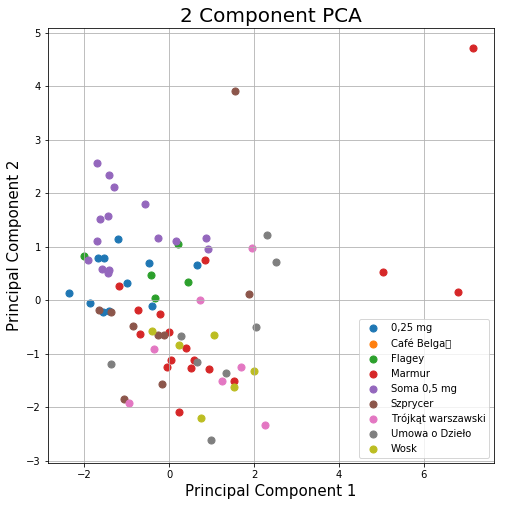

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()

targets = [
    '0,25 mg',
    'Café Belga	',
    'Flagey',
    'Marmur',
    'Soma 0,5 mg',
    'Szprycer',
    'Trójkąt warszawski',
    'Umowa o Dzieło',
    'Wosk'
]
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive'
]
for target, color in zip(targets, colors):
    indicesToKeep = final_data['album'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'PC1'],
               final_data.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)

## Czy da się pogrupować poszczególne albumy? Grupowanie hierarchiczne i dendrogram

In [65]:
import scipy.cluster.hierarchy as shc
from copy import deepcopy

In [105]:
data2 = deepcopy(data)
features2 = deepcopy(features)
features2.remove('duration_ms')
features2.remove('key')
features2.remove('mode')

In [106]:
for f in features2:
    data2[f] = data2[f] * data2['duration_ms']

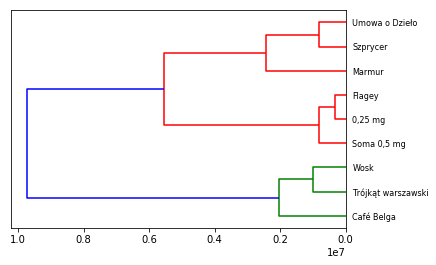

In [118]:
dend = data2.groupby('album').mean()
dendrogram = shc.dendrogram(shc.linkage(dend, method='ward'),
                            #leaf_rotation=90,
                            leaf_font_size=8,
                            labels=dend.index,
                            orientation="left")

## Rozkład popularności twórczości Taco Hemingwaya na Spotify (stan z dn. 30 marca 2019)

Popularność danej piosenki determinują dwa czynniki: całkowita ilość odtworzeń w porównaniu do innych oraz **jak dawne są to odtworzenia**. Przez to z czasem, kiedy piosenka przestaje być słuchana z taką częstotliwością jak wcześniej, jej popularność spada.

Co więcej, jeśli na Spotify dostępne są **dwie różne wersje** danej piosenki (np. wersja z singla i z albumu), Spotify traktuje je jako **dwa różne utwory** (chociaż dane dot. charakterystyki muzycznej są takie same). W swoich danych ograniczyłam się do piosenek z albumów i EP, pomijając single. Przykładem jest popularność utworu *Tamagotchi* w wersji singlowej i albumowej (odpowiednio 58 i 57).

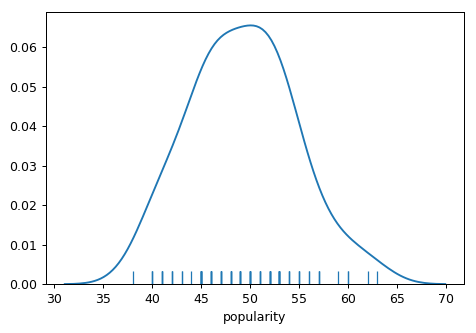

In [54]:
sns.distplot(data.popularity, rug=True, hist=False)

In [56]:
popular_data = data
popular_data['is_popular'] = popular_data.popularity >= 55
popular_data

,name,artist,album,release_date,spotify_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,is_popular
0,Café Belga,Taco Hemingway,Café Belga,2018-07-13,1RgUcHLTLSMiNG941CYzQL,56,0.4600,0.670,249653,0.607,0.000002,8,0.3840,-7.606,1,0.1640,174.017,0.2460,True
1,ZTM,Taco Hemingway,Café Belga,2018-07-13,0kF9dFTuO9G2IpcDcPMKxQ,60,0.3690,0.816,279947,0.560,0.000000,10,0.4740,-7.602,0,0.1780,139.022,0.6320,True
2,Wszystko Na Niby,Taco Hemingway,Café Belga,2018-07-13,48A8IJh1Ggc8wfWwzG5yrk,55,0.4100,0.660,258187,0.534,0.000000,8,0.4940,-9.774,1,0.2240,78.006,0.5370,True
3,Reżyseria: Kubrick,Taco Hemingway,Café Belga,2018-07-13,1V0h7CzbB9AT8LZRzOCdTI,52,0.4540,0.674,211813,0.504,0.000000,1,0.3080,-5.457,0,0.3870,181.625,0.3200,False
4,2031,Taco Hemingway,Café Belga,2018-07-13,3wvhIkvzZKCab1FpZXkWI7,53,0.2250,0.859,299547,0.524,0.000000,5,0.0922,-8.450,1,0.3510,138.027,0.7000,False
5,Fiji,Taco Hemingway,Café Belga,2018-07-13,2CdCs9y04oDuYCF4ewNzI7,63,0.1970,0.774,242560,0.813,0.002330,5,0.1220,-5.569,0,0.1220,104.996,0.3510,True
6,Abonent jest czasowo niedostępny,Taco Hemingway,Café Belga,2018-07-13,1fnZtBU5wFERbmgPGp3fO0,51,0.3910,0.644,273960,0.636,0.000001,7,0.1320,-9.270,0,0.1420,110.150,0.1490,False
7,Motorola,Taco Hemingway,Café Belga,2018-07-13,0HM8Uj8DRSG24HmCbYEfb0,50,0.4170,0.793,191680,0.567,0.000000,1,0.1390,-9.638,1,0.1940,113.991,0.3000,False
8,Modigliani,Taco Hemingway,Café Belga,2018-07-13,0gP2wIzhyjlsxjidUekcqb,52,0.4390,0.722,230080,0.539,0.000000,5,0.4010,-8.615,0,0.1110,142.978,0.2120,False
9,Adieu,Taco Hemingway,Café Belga,2018-07-13,5PoFppTTSK8D2y7z4bZPjH,53,0.2350,0.756,286987,0.707,0.000000,1,0.7460,-6.689,1,0.2090,100.002,0.5180,False


## Czy najpopularniejsze piosenki Taco mają podobne parametry muzyczne? PCA

to do: to samo co w poprzednim PCA tylko zamiast grupowania po albumie grupowanie po popularności

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
features = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]
x = data.loc[:, features].values
y = data.loc[:, ['is_popular']].values

In [63]:
x = StandardScaler().fit_transform(x)

In [67]:
pca = PCA(n_components=2)

In [68]:
principal_components = pca.fit_transform(x)

In [69]:
principal_data = pd.DataFrame(data=principal_components,
                             columns=['PC1', 'PC2'])

In [70]:
final_data = pd.concat([principal_data, data.is_popular], axis=1)

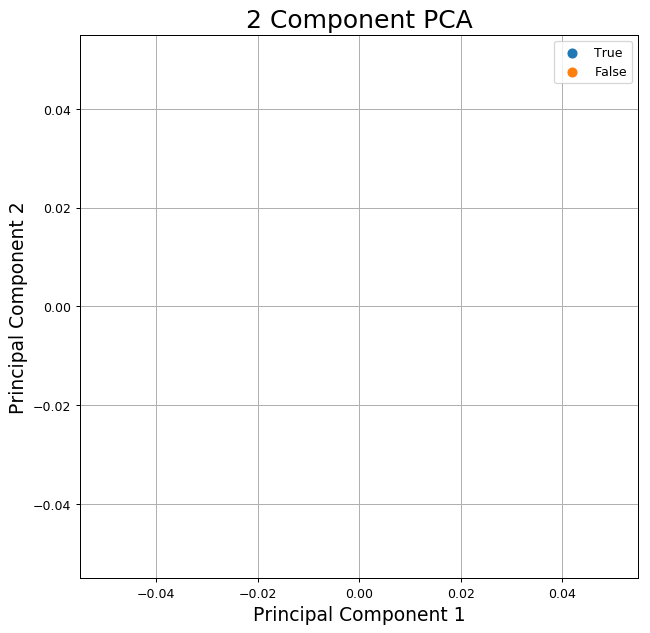

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()

targets = [True, False]
colors = [
    'tab:blue',
    'tab:orange'
]
for target, color in zip(targets, colors):
    indicesToKeep = final_data['is_popu'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'PC1'],
               final_data.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)